In [1]:
#Installing required packages

#!pip install WordNet
#!pip install torch
#!pip install spacy
#!pip install -U spacy 
#pip install transformers
#!python -m spacy download en_core_web_sm

#importing required libraries

import pandas as pd
import numpy as np 
import nltk
import re
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns


#  Preprocesssing textual data

from nltk import word_tokenize, pos_tag
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', 1000)

# additional nltk resources

nltk.download('stopwords')
nltk.download('lemmatizer')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

# Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer


# Check Performance
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading lemmatizer: Package 'lemmatizer' not found
[nltk_data]     in index
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\U

In [2]:
# Importing required data AND Overview
data = pd.read_csv(r"C:\Users\sukan\ipba\csv\comments_for_video_tfcQqWiAwpk .csv")
data.head(25)

,Comment Number,Reply Number,Like Count,Published At,Text
0,1.0,NaN,0,2023-02-22T06:47:28Z,"They hear ""groomers"" and ""pedophiles"" and the first thing they think about is LGBT and Drag, bigots surely do tell on themselves lol, but nooo, we right wing are the bigots"
1,2.0,NaN,0,2023-02-13T10:55:05Z,The weakest coverge of the real issues... this is proper Fake News..
2,3.0,NaN,0,2023-02-09T21:44:20Z,"Wow the false rhetoric from this show literally makes me sick t o my stomach the way they turn every freaking topic into a pollical false hood. Can someone from the show please produce something that says the people at the table on this show are experts on politics? if you can please stop bring it into every topic. and speaking about the former administration (Trump) move on old cows, move one it time for you to go to pasture"
3,4.0,NaN,0,2023-02-08T14:32:01Z,These women all own Baalenciaga!! Joy Behar tryna pretend she doesn't know anything about it... give me a fkg break! And they don't care about kids being exploited at all! They just care about whether their brand is ugly!!!! The Spew is DISGUSTING!!
4,5.0,NaN,0,2023-01-31T15:25:26Z,Too many sickos 😢
5,6.0,NaN,0,2023-01-19T10:01:02Z,At this moment?!?!! P*dophilia is not a right or left issue! This is a human issue. It’s not funny. It’s not just one incident but SEVERAL! If this is your take on a company who openly promotes child sexual abuse… as a democrat & mother I can’t in good conscience watch your show. #dobetter
6,7.0,NaN,0,2023-01-18T05:36:10Z,Wow so instead of addressing the issue you go and blame game on Trump ! Are you guys serious ? The real story …… the media will always cover
7,8.0,NaN,0,2023-01-11T00:59:57Z,Disgusting. With a supreme court ruling on the table of a petifile Case # LOOK INTO IT THEY DID THIS ON PURPOSE. BUT ANYONE WATCHING THIS SNIT MIGHT AS WELL BE LABOTAMISED
8,9.0,NaN,0,2023-01-05T05:04:27Z,"How dare you say “right wingers” 🤮 Absolutely disrespectful and gross of you ! Conservatives like MYSELF a 33 year old mom!- are absolutely disgusted by this company. FYI we are fine with people of all genders and relationships we love you all and we are fine with basically a lot of stuff . The old school conservatives are more religious ues but regardless we all still love you and are not racist or sexist! Please try watching political commentary that is the opposite of what you’d normally listen and watch. I’m still subscribed to several far left and Democratic channels because it keeps me based. Love to you all - point blank period, - 🌸 Sky\n\n\nExcept pedos lol"
9,10.0,NaN,0,2023-01-03T09:38:07Z,I believe they are satanists now all of them


In [3]:
data.shape

(2281, 5)

In [4]:
# Changing name of 'text' column to 'Comments' column
data.rename(columns = {'Text':'Comments'}, inplace = True)
# removing columns

data = data.drop(['Like Count','Reply Number','Comment Number','Published At'], axis=1)
#data = data[['Comments']][:4000]

In [5]:
data['Comments'] =data['Comments'].astype(str)

In [6]:
data.head()

,Comments
0,"They hear ""groomers"" and ""pedophiles"" and the first thing they think about is LGBT and Drag, bigots surely do tell on themselves lol, but nooo, we right wing are the bigots"
1,The weakest coverge of the real issues... this is proper Fake News..
2,"Wow the false rhetoric from this show literally makes me sick t o my stomach the way they turn every freaking topic into a pollical false hood. Can someone from the show please produce something that says the people at the table on this show are experts on politics? if you can please stop bring it into every topic. and speaking about the former administration (Trump) move on old cows, move one it time for you to go to pasture"
3,These women all own Baalenciaga!! Joy Behar tryna pretend she doesn't know anything about it... give me a fkg break! And they don't care about kids being exploited at all! They just care about whether their brand is ugly!!!! The Spew is DISGUSTING!!
4,Too many sickos 😢


In [7]:
data.dtypes

Comments    object
dtype: object

In [8]:
data.shape

(2281, 1)

In [9]:
#### EDA- cleaning

In [10]:
# URLs removal and extra spaces too

data['Comments'] = data['Comments'].apply(lambda x: re.sub(r'https?\S+ðŸ˜žðŸ˜­ðŸ¤¬', '', x).strip())

In [11]:
##Remove punctuation

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [12]:
# Commit to Table
data['Comments'] = data['Comments'].apply(remove_punctuations)

In [13]:
# Convert to lower 
data['Comments']=data['Comments'].apply(lambda x: x.lower())

In [14]:
# Get Stopwords
stop = stopwords.words('english')

In [15]:
# Tokenize and Remove Stop Words
data['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])

0                                                                                                                                                                                                                               [hear, groomers, pedophiles, first, thing, think, lgbt, drag, bigots, surely, tell, lol, nooo, right, wing, bigots]
1                                                                                                                                                                                                                                                                                              [weakest, coverge, real, issues, proper, fake, news]
2       [wow, false, rhetoric, show, literally, makes, sick, stomach, way, turn, every, freaking, topic, pollical, false, hood, someone, show, please, produce, something, says, people, table, show, experts, politics, please, stop, bring, every, topic, speaking, former, administration, trump, move, old, cows, move, one,

In [16]:
# Join the words back
data['Comments'] = data['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [17]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

In [18]:
# Commit to Table

data['Comments'] = data['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

In [19]:
# Instantiate the TweetTokenizer
tokenizer = TweetTokenizer()

# Define a function to tokenize a tweet
def tokenize_tweet(tweet):
    # Use the TweetTokenizer to tokenize the tweet
    tokens = tokenizer.tokenize(tweet)
    return tokens

# Apply the tokenization function to the 'Comments' column
data['Tokens'] = data['Comments'].apply(tokenize_tweet)

In [20]:
def pos_tagging(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    # Return the tagged tokens
    return tagged_tokens

In [21]:
# Applying the POS tagging function to the 'Comments' column
data['POS_Tagged'] = data['Comments'].apply(pos_tagging)

In [22]:
data.head()

,Comments,Tokens,POS_Tagged
0,hear groomers pedophiles first thing think lgbt drag bigots surely tell lol nooo right wing bigots,"[hear, groomers, pedophiles, first, thing, think, lgbt, drag, bigots, surely, tell, lol, nooo, right, wing, bigots]","[(hear, JJ), (groomers, NNS), (pedophiles, NNS), (first, RB), (thing, NN), (think, NN), (lgbt, VBP), (drag, VBP), (bigots, NNS), (surely, RB), (tell, VBP), (lol, JJ), (nooo, RB), (right, JJ), (wing, VBG), (bigots, NNS)]"
1,weakest coverge real issues proper fake news,"[weakest, coverge, real, issues, proper, fake, news]","[(weakest, JJS), (coverge, NN), (real, JJ), (issues, NNS), (proper, VBP), (fake, JJ), (news, NN)]"
2,wow false rhetoric show literally makes sick stomach way turn every freaking topic pollical false hood someone show please produce something says people table show experts politics please stop bring every topic speaking former administration trump move old cows move one time go pasture,"[wow, false, rhetoric, show, literally, makes, sick, stomach, way, turn, every, freaking, topic, pollical, false, hood, someone, show, please, produce, something, says, people, table, show, experts, politics, please, stop, bring, every, topic, speaking, former, administration, trump, move, old, cows, move, one, time, go, pasture]","[(wow, NN), (false, JJ), (rhetoric, NN), (show, NN), (literally, RB), (makes, VBZ), (sick, JJ), (stomach, NN), (way, NN), (turn, VBP), (every, DT), (freaking, NN), (topic, NN), (pollical, JJ), (false, JJ), (hood, NN), (someone, NN), (show, NN), (please, NN), (produce, VB), (something, NN), (says, VBZ), (people, NNS), (table, JJ), (show, NN), (experts, NNS), (politics, NNS), (please, VBP), (stop, VB), (bring, NN), (every, DT), (topic, NN), (speaking, VBG), (former, JJ), (administration, NN), (trump, NN), (move, VBP), (old, JJ), (cows, NNS), (move, VB), (one, CD), (time, NN), (go, VB), (pasture, NN)]"
3,women baalenciaga joy behar tryna pretend doesnt know anything give fkg break dont care kids exploited care whether brand ugly spew disgusting,"[women, baalenciaga, joy, behar, tryna, pretend, doesnt, know, anything, give, fkg, break, dont, care, kids, exploited, care, whether, brand, ugly, spew, disgusting]","[(women, NNS), (baalenciaga, VBD), (joy, NN), (behar, NN), (tryna, JJ), (pretend, NN), (doesnt, NN), (know, VBP), (anything, NN), (give, JJ), (fkg, NN), (break, NN), (dont, NN), (care, NN), (kids, NNS), (exploited, VBD), (care, NN), (whether, IN), (brand, NN), (ugly, RB), (spew, JJ), (disgusting, VBG)]"
4,many sickos 😢,"[many, sickos, 😢]","[(many, JJ), (sickos, NNS), (😢, VBP)]"


In [23]:
####Creating models and using it on the dataset

In [24]:
###Analysing sentiments through vader

In [25]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = data['Comments'].apply(sid.polarity_scores)

In [26]:
data["vader_score"] = sentiment_scores.apply(lambda x: x['compound'])

In [27]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score
0,hear groomers pedophiles first thing think lgbt drag bigots surely tell lol nooo right wing bigots,"[hear, groomers, pedophiles, first, thing, think, lgbt, drag, bigots, surely, tell, lol, nooo, right, wing, bigots]","[(hear, JJ), (groomers, NNS), (pedophiles, NNS), (first, RB), (thing, NN), (think, NN), (lgbt, VBP), (drag, VBP), (bigots, NNS), (surely, RB), (tell, VBP), (lol, JJ), (nooo, RB), (right, JJ), (wing, VBG), (bigots, NNS)]",0.5859
1,weakest coverge real issues proper fake news,"[weakest, coverge, real, issues, proper, fake, news]","[(weakest, JJS), (coverge, NN), (real, JJ), (issues, NNS), (proper, VBP), (fake, JJ), (news, NN)]",-0.7506
2,wow false rhetoric show literally makes sick stomach way turn every freaking topic pollical false hood someone show please produce something says people table show experts politics please stop bring every topic speaking former administration trump move old cows move one time go pasture,"[wow, false, rhetoric, show, literally, makes, sick, stomach, way, turn, every, freaking, topic, pollical, false, hood, someone, show, please, produce, something, says, people, table, show, experts, politics, please, stop, bring, every, topic, speaking, former, administration, trump, move, old, cows, move, one, time, go, pasture]","[(wow, NN), (false, JJ), (rhetoric, NN), (show, NN), (literally, RB), (makes, VBZ), (sick, JJ), (stomach, NN), (way, NN), (turn, VBP), (every, DT), (freaking, NN), (topic, NN), (pollical, JJ), (false, JJ), (hood, NN), (someone, NN), (show, NN), (please, NN), (produce, VB), (something, NN), (says, VBZ), (people, NNS), (table, JJ), (show, NN), (experts, NNS), (politics, NNS), (please, VBP), (stop, VB), (bring, NN), (every, DT), (topic, NN), (speaking, VBG), (former, JJ), (administration, NN), (trump, NN), (move, VBP), (old, JJ), (cows, NNS), (move, VB), (one, CD), (time, NN), (go, VB), (pasture, NN)]",0.0258
3,women baalenciaga joy behar tryna pretend doesnt know anything give fkg break dont care kids exploited care whether brand ugly spew disgusting,"[women, baalenciaga, joy, behar, tryna, pretend, doesnt, know, anything, give, fkg, break, dont, care, kids, exploited, care, whether, brand, ugly, spew, disgusting]","[(women, NNS), (baalenciaga, VBD), (joy, NN), (behar, NN), (tryna, JJ), (pretend, NN), (doesnt, NN), (know, VBP), (anything, NN), (give, JJ), (fkg, NN), (break, NN), (dont, NN), (care, NN), (kids, NNS), (exploited, VBD), (care, NN), (whether, IN), (brand, NN), (ugly, RB), (spew, JJ), (disgusting, VBG)]",-0.7249
4,many sickos 😢,"[many, sickos, 😢]","[(many, JJ), (sickos, NNS), (😢, VBP)]",0.0000


In [28]:
count_total=0
count_pos=0
count_neg=0
#count_neut=0


for i in data["vader_score"]:
    if i >=0:
        count_pos=count_pos+1
    elif i <0:
        count_neg = count_neg +1
    else:
        0
        #count_neut = count_neut +1
        
 

print("positive tweets:",count_pos)
print("negative tweets:",count_neg)

conditions = [
    (data['vader_score'] >=0),
    (data['vader_score'] <0)]
    
choices = [1,0]
data['vader_sentiment'] = np.select(conditions, choices )

positive tweets: 1174
negative tweets: 1107


In [29]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment
0,hear groomers pedophiles first thing think lgbt drag bigots surely tell lol nooo right wing bigots,"[hear, groomers, pedophiles, first, thing, think, lgbt, drag, bigots, surely, tell, lol, nooo, right, wing, bigots]","[(hear, JJ), (groomers, NNS), (pedophiles, NNS), (first, RB), (thing, NN), (think, NN), (lgbt, VBP), (drag, VBP), (bigots, NNS), (surely, RB), (tell, VBP), (lol, JJ), (nooo, RB), (right, JJ), (wing, VBG), (bigots, NNS)]",0.5859,1
1,weakest coverge real issues proper fake news,"[weakest, coverge, real, issues, proper, fake, news]","[(weakest, JJS), (coverge, NN), (real, JJ), (issues, NNS), (proper, VBP), (fake, JJ), (news, NN)]",-0.7506,0
2,wow false rhetoric show literally makes sick stomach way turn every freaking topic pollical false hood someone show please produce something says people table show experts politics please stop bring every topic speaking former administration trump move old cows move one time go pasture,"[wow, false, rhetoric, show, literally, makes, sick, stomach, way, turn, every, freaking, topic, pollical, false, hood, someone, show, please, produce, something, says, people, table, show, experts, politics, please, stop, bring, every, topic, speaking, former, administration, trump, move, old, cows, move, one, time, go, pasture]","[(wow, NN), (false, JJ), (rhetoric, NN), (show, NN), (literally, RB), (makes, VBZ), (sick, JJ), (stomach, NN), (way, NN), (turn, VBP), (every, DT), (freaking, NN), (topic, NN), (pollical, JJ), (false, JJ), (hood, NN), (someone, NN), (show, NN), (please, NN), (produce, VB), (something, NN), (says, VBZ), (people, NNS), (table, JJ), (show, NN), (experts, NNS), (politics, NNS), (please, VBP), (stop, VB), (bring, NN), (every, DT), (topic, NN), (speaking, VBG), (former, JJ), (administration, NN), (trump, NN), (move, VBP), (old, JJ), (cows, NNS), (move, VB), (one, CD), (time, NN), (go, VB), (pasture, NN)]",0.0258,1
3,women baalenciaga joy behar tryna pretend doesnt know anything give fkg break dont care kids exploited care whether brand ugly spew disgusting,"[women, baalenciaga, joy, behar, tryna, pretend, doesnt, know, anything, give, fkg, break, dont, care, kids, exploited, care, whether, brand, ugly, spew, disgusting]","[(women, NNS), (baalenciaga, VBD), (joy, NN), (behar, NN), (tryna, JJ), (pretend, NN), (doesnt, NN), (know, VBP), (anything, NN), (give, JJ), (fkg, NN), (break, NN), (dont, NN), (care, NN), (kids, NNS), (exploited, VBD), (care, NN), (whether, IN), (brand, NN), (ugly, RB), (spew, JJ), (disgusting, VBG)]",-0.7249,0
4,many sickos 😢,"[many, sickos, 😢]","[(many, JJ), (sickos, NNS), (😢, VBP)]",0.0000,1


In [30]:
for i in data['vader_sentiment']:
    if i == 1:
        lable= ("Positive")
    elif i ==0:
        lable= ("Negative")
    else:
        0

        
(data['vader_sentiment'] ==1),
(data['vader_sentiment'] ==0),

choices = ["Positive","Negative"]

data['vader_labels'] = np.select(conditions, choices )

In [31]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels
0,hear groomers pedophiles first thing think lgbt drag bigots surely tell lol nooo right wing bigots,"[hear, groomers, pedophiles, first, thing, think, lgbt, drag, bigots, surely, tell, lol, nooo, right, wing, bigots]","[(hear, JJ), (groomers, NNS), (pedophiles, NNS), (first, RB), (thing, NN), (think, NN), (lgbt, VBP), (drag, VBP), (bigots, NNS), (surely, RB), (tell, VBP), (lol, JJ), (nooo, RB), (right, JJ), (wing, VBG), (bigots, NNS)]",0.5859,1,Positive
1,weakest coverge real issues proper fake news,"[weakest, coverge, real, issues, proper, fake, news]","[(weakest, JJS), (coverge, NN), (real, JJ), (issues, NNS), (proper, VBP), (fake, JJ), (news, NN)]",-0.7506,0,Negative
2,wow false rhetoric show literally makes sick stomach way turn every freaking topic pollical false hood someone show please produce something says people table show experts politics please stop bring every topic speaking former administration trump move old cows move one time go pasture,"[wow, false, rhetoric, show, literally, makes, sick, stomach, way, turn, every, freaking, topic, pollical, false, hood, someone, show, please, produce, something, says, people, table, show, experts, politics, please, stop, bring, every, topic, speaking, former, administration, trump, move, old, cows, move, one, time, go, pasture]","[(wow, NN), (false, JJ), (rhetoric, NN), (show, NN), (literally, RB), (makes, VBZ), (sick, JJ), (stomach, NN), (way, NN), (turn, VBP), (every, DT), (freaking, NN), (topic, NN), (pollical, JJ), (false, JJ), (hood, NN), (someone, NN), (show, NN), (please, NN), (produce, VB), (something, NN), (says, VBZ), (people, NNS), (table, JJ), (show, NN), (experts, NNS), (politics, NNS), (please, VBP), (stop, VB), (bring, NN), (every, DT), (topic, NN), (speaking, VBG), (former, JJ), (administration, NN), (trump, NN), (move, VBP), (old, JJ), (cows, NNS), (move, VB), (one, CD), (time, NN), (go, VB), (pasture, NN)]",0.0258,1,Positive
3,women baalenciaga joy behar tryna pretend doesnt know anything give fkg break dont care kids exploited care whether brand ugly spew disgusting,"[women, baalenciaga, joy, behar, tryna, pretend, doesnt, know, anything, give, fkg, break, dont, care, kids, exploited, care, whether, brand, ugly, spew, disgusting]","[(women, NNS), (baalenciaga, VBD), (joy, NN), (behar, NN), (tryna, JJ), (pretend, NN), (doesnt, NN), (know, VBP), (anything, NN), (give, JJ), (fkg, NN), (break, NN), (dont, NN), (care, NN), (kids, NNS), (exploited, VBD), (care, NN), (whether, IN), (brand, NN), (ugly, RB), (spew, JJ), (disgusting, VBG)]",-0.7249,0,Negative
4,many sickos 😢,"[many, sickos, 😢]","[(many, JJ), (sickos, NNS), (😢, VBP)]",0.0000,1,Positive


<AxesSubplot:xlabel='vader_labels', ylabel='count'>

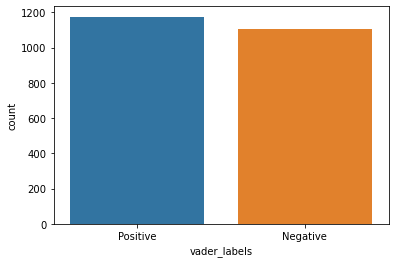

In [32]:
import seaborn as sns

sns.countplot(x='vader_labels', data=data)

Positive Sentiments


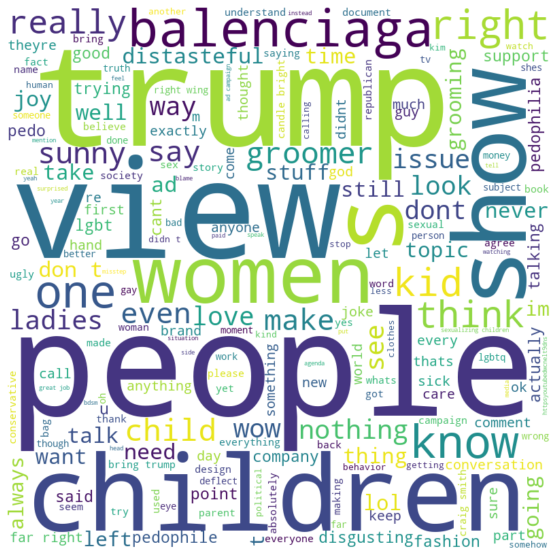

Negative Sentiments


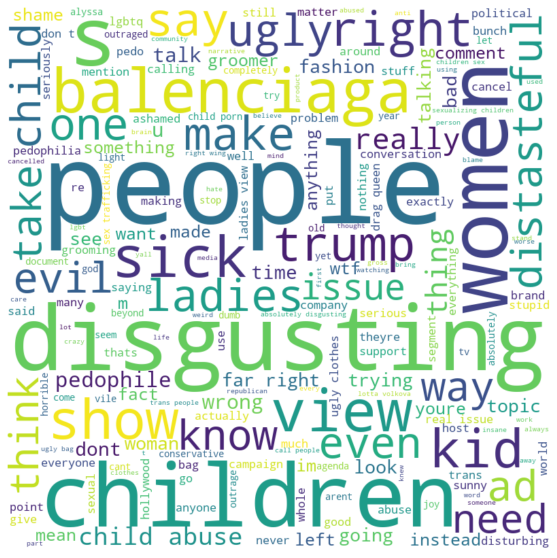

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['vader_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['vader_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [34]:
###Analysing sentiments through pretrained roBERTa

In [35]:
## Importing model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [36]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [37]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
# List of samples
samples = data['Comments'].tolist()

# List to store the scores for each sample
scores_list = []

# Calculate the scores for each sample and store in the scores_list
for sample in samples:
    encoded_text = tokenizer(sample, padding=True, truncation=True, max_length=128, return_tensors='pt')
    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']
    output = model(input_ids=input_ids, attention_mask=attention_mask)
    scores = torch.softmax(output.logits, dim=1)
    scores_dict = {
        'roberta_neg' : scores[0][0].item(),  
        'roberta_pos' : scores[0][1].item()
    }
    scores_list.append(scores_dict)

# Create a pandas dataframe from the scores_list
scores_df = pd.DataFrame(scores_list)

# Concatenate the original data and scores_df dataframes horizontally
data = pd.concat([data, scores_df], axis=1)

# Print the updated dataframe
print(data)

                                                                                                                                                                                                                                                                                            Comments  \
0                                                                                                                                                                                                 hear groomers pedophiles first thing think lgbt drag bigots surely tell lol nooo right wing bigots   
1                                                                                                                                                                                                                                                       weakest coverge real issues proper fake news   
2     wow false rhetoric show literally makes sick stomach way turn every freaking topic pollical false hood som

In [38]:
data.head(15)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos
0,hear groomers pedophiles first thing think lgbt drag bigots surely tell lol nooo right wing bigots,"[hear, groomers, pedophiles, first, thing, think, lgbt, drag, bigots, surely, tell, lol, nooo, right, wing, bigots]","[(hear, JJ), (groomers, NNS), (pedophiles, NNS), (first, RB), (thing, NN), (think, NN), (lgbt, VBP), (drag, VBP), (bigots, NNS), (surely, RB), (tell, VBP), (lol, JJ), (nooo, RB), (right, JJ), (wing, VBG), (bigots, NNS)]",0.5859,1,Positive,0.720128,0.264783
1,weakest coverge real issues proper fake news,"[weakest, coverge, real, issues, proper, fake, news]","[(weakest, JJS), (coverge, NN), (real, JJ), (issues, NNS), (proper, VBP), (fake, JJ), (news, NN)]",-0.7506,0,Negative,0.783669,0.206982
2,wow false rhetoric show literally makes sick stomach way turn every freaking topic pollical false hood someone show please produce something says people table show experts politics please stop bring every topic speaking former administration trump move old cows move one time go pasture,"[wow, false, rhetoric, show, literally, makes, sick, stomach, way, turn, every, freaking, topic, pollical, false, hood, someone, show, please, produce, something, says, people, table, show, experts, politics, please, stop, bring, every, topic, speaking, former, administration, trump, move, old, cows, move, one, time, go, pasture]","[(wow, NN), (false, JJ), (rhetoric, NN), (show, NN), (literally, RB), (makes, VBZ), (sick, JJ), (stomach, NN), (way, NN), (turn, VBP), (every, DT), (freaking, NN), (topic, NN), (pollical, JJ), (false, JJ), (hood, NN), (someone, NN), (show, NN), (please, NN), (produce, VB), (something, NN), (says, VBZ), (people, NNS), (table, JJ), (show, NN), (experts, NNS), (politics, NNS), (please, VBP), (stop, VB), (bring, NN), (every, DT), (topic, NN), (speaking, VBG), (former, JJ), (administration, NN), (trump, NN), (move, VBP), (old, JJ), (cows, NNS), (move, VB), (one, CD), (time, NN), (go, VB), (pasture, NN)]",0.0258,1,Positive,0.953160,0.043517
3,women baalenciaga joy behar tryna pretend doesnt know anything give fkg break dont care kids exploited care whether brand ugly spew disgusting,"[women, baalenciaga, joy, behar, tryna, pretend, doesnt, know, anything, give, fkg, break, dont, care, kids, exploited, care, whether, brand, ugly, spew, disgusting]","[(women, NNS), (baalenciaga, VBD), (joy, NN), (behar, NN), (tryna, JJ), (pretend, NN), (doesnt, NN), (know, VBP), (anything, NN), (give, JJ), (fkg, NN), (break, NN), (dont, NN), (care, NN), (kids, NNS), (exploited, VBD), (care, NN), (whether, IN), (brand, NN), (ugly, RB), (spew, JJ), (disgusting, VBG)]",-0.7249,0,Negative,0.951615,0.045513
4,many sickos 😢,"[many, sickos, 😢]","[(many, JJ), (sickos, NNS), (😢, VBP)]",0.0000,1,Positive,0.932360,0.057910
5,moment pdophilia right left issue human issue it’s funny it’s one incident several take company openly promotes child sexual abuse… democrat mother can’t good conscience watch show dobetter,"[moment, pdophilia, right, left, issue, human, issue, it, ’, s, funny, it, ’, s, one, incident, several, take, company, openly, promotes, child, sexual, abuse, …, democrat, mother, can, ’, t, good, conscience, watch, show, dobetter]","[(moment, NN), (pdophilia, NN), (right, NN), (left, VBD), (issue, NN), (human, JJ), (issue, NN), (it, PRP), (’, VBZ), (s, JJ), (funny, JJ), (it, PRP), (’, VBZ), (s, JJ), (one, CD), (incident, JJ), (several, JJ), (take, VB), (company, NN), (openly, RB), (promotes, VBZ), (child, JJ), (sexual, JJ), (abuse…, NN), (democrat, IN), (mother, NN), (can, MD), (’, VB), (t, RB), (good, JJ), (conscience, NN), (watch, NN), (show, NN), (dobetter, NN)]",0.8020,1,Positive,0.815856,0.165651
6,wow instead addressing issue go blame game trump guys serious real story …… media always cover,"[wow, instead, addressing, issue, go, blame, game, trump, guys, serious, real, story, …, …, media, always, cover]","[(wow, NN), (instead, RB), (addressi

In [39]:
def get_label(score):
    if score > 0.5:
        return "Positive"
    else:
        return "Negative"

# Convert the scores to labels for each model
data["roberta_labels"] = data["roberta_pos"].apply(get_label)

In [40]:
data.head(5)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos,roberta_labels
0,hear groomers pedophiles first thing think lgbt drag bigots surely tell lol nooo right wing bigots,"[hear, groomers, pedophiles, first, thing, think, lgbt, drag, bigots, surely, tell, lol, nooo, right, wing, bigots]","[(hear, JJ), (groomers, NNS), (pedophiles, NNS), (first, RB), (thing, NN), (think, NN), (lgbt, VBP), (drag, VBP), (bigots, NNS), (surely, RB), (tell, VBP), (lol, JJ), (nooo, RB), (right, JJ), (wing, VBG), (bigots, NNS)]",0.5859,1,Positive,0.720128,0.264783,Negative
1,weakest coverge real issues proper fake news,"[weakest, coverge, real, issues, proper, fake, news]","[(weakest, JJS), (coverge, NN), (real, JJ), (issues, NNS), (proper, VBP), (fake, JJ), (news, NN)]",-0.7506,0,Negative,0.783669,0.206982,Negative
2,wow false rhetoric show literally makes sick stomach way turn every freaking topic pollical false hood someone show please produce something says people table show experts politics please stop bring every topic speaking former administration trump move old cows move one time go pasture,"[wow, false, rhetoric, show, literally, makes, sick, stomach, way, turn, every, freaking, topic, pollical, false, hood, someone, show, please, produce, something, says, people, table, show, experts, politics, please, stop, bring, every, topic, speaking, former, administration, trump, move, old, cows, move, one, time, go, pasture]","[(wow, NN), (false, JJ), (rhetoric, NN), (show, NN), (literally, RB), (makes, VBZ), (sick, JJ), (stomach, NN), (way, NN), (turn, VBP), (every, DT), (freaking, NN), (topic, NN), (pollical, JJ), (false, JJ), (hood, NN), (someone, NN), (show, NN), (please, NN), (produce, VB), (something, NN), (says, VBZ), (people, NNS), (table, JJ), (show, NN), (experts, NNS), (politics, NNS), (please, VBP), (stop, VB), (bring, NN), (every, DT), (topic, NN), (speaking, VBG), (former, JJ), (administration, NN), (trump, NN), (move, VBP), (old, JJ), (cows, NNS), (move, VB), (one, CD), (time, NN), (go, VB), (pasture, NN)]",0.0258,1,Positive,0.953160,0.043517,Negative
3,women baalenciaga joy behar tryna pretend doesnt know anything give fkg break dont care kids exploited care whether brand ugly spew disgusting,"[women, baalenciaga, joy, behar, tryna, pretend, doesnt, know, anything, give, fkg, break, dont, care, kids, exploited, care, whether, brand, ugly, spew, disgusting]","[(women, NNS), (baalenciaga, VBD), (joy, NN), (behar, NN), (tryna, JJ), (pretend, NN), (doesnt, NN), (know, VBP), (anything, NN), (give, JJ), (fkg, NN), (break, NN), (dont, NN), (care, NN), (kids, NNS), (exploited, VBD), (care, NN), (whether, IN), (brand, NN), (ugly, RB), (spew, JJ), (disgusting, VBG)]",-0.7249,0,Negative,0.951615,0.045513,Negative
4,many sickos 😢,"[many, sickos, 😢]","[(many, JJ), (sickos, NNS), (😢, VBP)]",0.0000,1,Positive,0.932360,0.057910,Negative


<AxesSubplot:xlabel='roberta_labels', ylabel='count'>

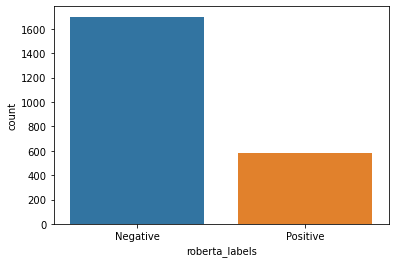

In [41]:
import seaborn as sns

sns.countplot(x='roberta_labels', data=data)

Positive Sentiments


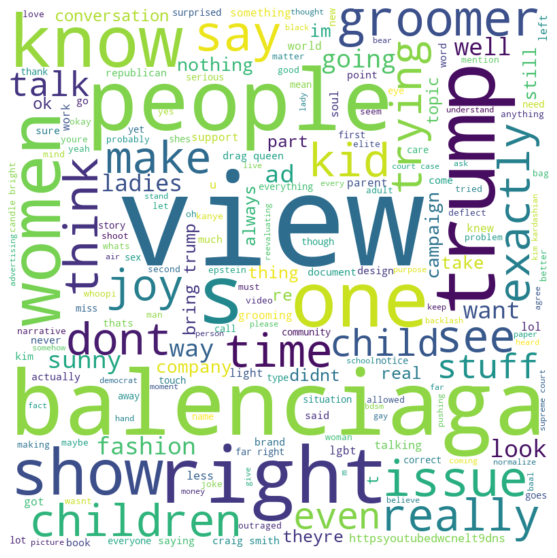

Negative Sentiments


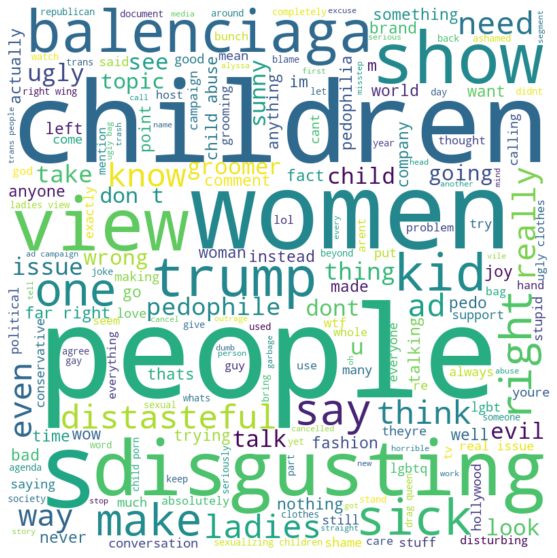

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['roberta_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['roberta_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [43]:
### Analysing sentiments through huggingface transformers

In [44]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [45]:
import spacy
import pandas as pd

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('sentencizer')

#Export sample comments from all the datasets
text = data['Comments'].tolist()[:100]
sentences = []
for doc in nlp.pipe(text):
    sentences.extend([sent.text for sent in doc.sents])

print(sentences)

['hear groomers pedophiles first thing think lgbt drag bigots surely tell lol nooo right wing bigots', 'weakest coverge real issues proper fake news', 'wow false rhetoric show literally makes sick stomach way turn every freaking topic pollical false hood someone show please produce something says people table show experts politics please stop bring every topic speaking former administration trump move old cows move one time go pasture', 'women baalenciaga joy behar tryna pretend doesnt know anything give fkg break dont care kids exploited care whether brand ugly spew disgusting', 'many sickos 😢', 'moment pdophilia right left issue human issue', 'it’s funny', 'it’s one incident several take company openly promotes child sexual abuse… democrat mother can’t good conscience watch show dobetter', 'wow instead addressing issue go blame game trump guys serious real story …… media always cover', 'disgusting supreme court ruling table petifile case look purpose anyone watching snit might well l

In [46]:
sent_pipeline(data['Comments'].tolist()[:100])

[{'label': 'NEGATIVE', 'score': 0.9943814873695374},
 {'label': 'NEGATIVE', 'score': 0.9996115565299988},
 {'label': 'NEGATIVE', 'score': 0.996878981590271},
 {'label': 'NEGATIVE', 'score': 0.9984440207481384},
 {'label': 'NEGATIVE', 'score': 0.9980512857437134},
 {'label': 'POSITIVE', 'score': 0.8480226397514343},
 {'label': 'NEGATIVE', 'score': 0.8649327158927917},
 {'label': 'NEGATIVE', 'score': 0.9992263317108154},
 {'label': 'NEGATIVE', 'score': 0.995073139667511},
 {'label': 'NEGATIVE', 'score': 0.9016234278678894},
 {'label': 'NEGATIVE', 'score': 0.9971168041229248},
 {'label': 'NEGATIVE', 'score': 0.9986782670021057},
 {'label': 'NEGATIVE', 'score': 0.9981887936592102},
 {'label': 'NEGATIVE', 'score': 0.9980558156967163},
 {'label': 'NEGATIVE', 'score': 0.9707353711128235},
 {'label': 'POSITIVE', 'score': 0.9792099595069885},
 {'label': 'NEGATIVE', 'score': 0.9954462051391602},
 {'label': 'NEGATIVE', 'score': 0.9958971738815308},
 {'label': 'NEGATIVE', 'score': 0.96528303623199

In [47]:
sentiments = sent_pipeline(data['Comments'].tolist())
data['transformer_score'] = [s['score'] for s in sentiments]
data['transformer_labels'] = [s['label'] for s in sentiments]

In [48]:
data['transformer_labels']=data['transformer_labels'].str.title()

In [49]:
data.head(15)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos,roberta_labels,transformer_score,transformer_labels
0,hear groomers pedophiles first thing think lgbt drag bigots surely tell lol nooo right wing bigots,"[hear, groomers, pedophiles, first, thing, think, lgbt, drag, bigots, surely, tell, lol, nooo, right, wing, bigots]","[(hear, JJ), (groomers, NNS), (pedophiles, NNS), (first, RB), (thing, NN), (think, NN), (lgbt, VBP), (drag, VBP), (bigots, NNS), (surely, RB), (tell, VBP), (lol, JJ), (nooo, RB), (right, JJ), (wing, VBG), (bigots, NNS)]",0.5859,1,Positive,0.720128,0.264783,Negative,0.994381,Negative
1,weakest coverge real issues proper fake news,"[weakest, coverge, real, issues, proper, fake, news]","[(weakest, JJS), (coverge, NN), (real, JJ), (issues, NNS), (proper, VBP), (fake, JJ), (news, NN)]",-0.7506,0,Negative,0.783669,0.206982,Negative,0.999612,Negative
2,wow false rhetoric show literally makes sick stomach way turn every freaking topic pollical false hood someone show please produce something says people table show experts politics please stop bring every topic speaking former administration trump move old cows move one time go pasture,"[wow, false, rhetoric, show, literally, makes, sick, stomach, way, turn, every, freaking, topic, pollical, false, hood, someone, show, please, produce, something, says, people, table, show, experts, politics, please, stop, bring, every, topic, speaking, former, administration, trump, move, old, cows, move, one, time, go, pasture]","[(wow, NN), (false, JJ), (rhetoric, NN), (show, NN), (literally, RB), (makes, VBZ), (sick, JJ), (stomach, NN), (way, NN), (turn, VBP), (every, DT), (freaking, NN), (topic, NN), (pollical, JJ), (false, JJ), (hood, NN), (someone, NN), (show, NN), (please, NN), (produce, VB), (something, NN), (says, VBZ), (people, NNS), (table, JJ), (show, NN), (experts, NNS), (politics, NNS), (please, VBP), (stop, VB), (bring, NN), (every, DT), (topic, NN), (speaking, VBG), (former, JJ), (administration, NN), (trump, NN), (move, VBP), (old, JJ), (cows, NNS), (move, VB), (one, CD), (time, NN), (go, VB), (pasture, NN)]",0.0258,1,Positive,0.953160,0.043517,Negative,0.996879,Negative
3,women baalenciaga joy behar tryna pretend doesnt know anything give fkg break dont care kids exploited care whether brand ugly spew disgusting,"[women, baalenciaga, joy, behar, tryna, pretend, doesnt, know, anything, give, fkg, break, dont, care, kids, exploited, care, whether, brand, ugly, spew, disgusting]","[(women, NNS), (baalenciaga, VBD), (joy, NN), (behar, NN), (tryna, JJ), (pretend, NN), (doesnt, NN), (know, VBP), (anything, NN), (give, JJ), (fkg, NN), (break, NN), (dont, NN), (care, NN), (kids, NNS), (exploited, VBD), (care, NN), (whether, IN), (brand, NN), (ugly, RB), (spew, JJ), (disgusting, VBG)]",-0.7249,0,Negative,0.951615,0.045513,Negative,0.998444,Negative
4,many sickos 😢,"[many, sickos, 😢]","[(many, JJ), (sickos, NNS), (😢, VBP)]",0.0000,1,Positive,0.932360,0.057910,Negative,0.998051,Negative
5,moment pdophilia right left issue human issue it’s funny it’s one incident several take company openly promotes child sexual abuse… democrat mother can’t good conscience watch show dobetter,"[moment, pdophilia, right, left, issue, human, issue, it, ’, s, funny, it, ’, s, one, incident, several, take, company, openly, promotes, child, sexual, abuse, …, democrat, mother, can, ’, t, good, conscience, watch, show, dobetter]","[(moment, NN), (pdophilia, NN), (right, NN), (left, VBD), (issue, NN), (human, JJ), (issue, NN), (it, PRP), (’, VBZ), (s, JJ), (funny, JJ), (it, PRP), (’, VBZ), (s, JJ), (one, CD), (incident, JJ), (several, JJ), (take, VB), (company, NN), (openly, RB), (promotes, VBZ), (child, JJ), (sexual, JJ), (abuse…, NN), (democrat, IN), (mother, NN), (can, MD), (’, VB), (t, RB), (good, JJ), (conscience, NN), (watch, NN), (show, NN), (dobetter, NN)]",0.8020,1,Positive,0.815856,0.165651,Negative,0.848023,Positive
6,wow instead addressing issue go bl

<AxesSubplot:xlabel='transformer_labels', ylabel='count'>

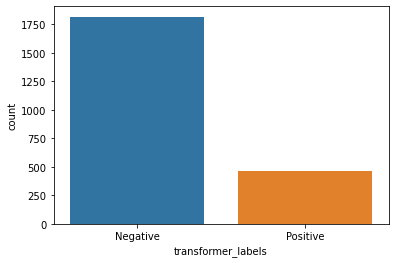

In [50]:
import seaborn as sns

sns.countplot(x='transformer_labels', data=data)

Positive Sentiments


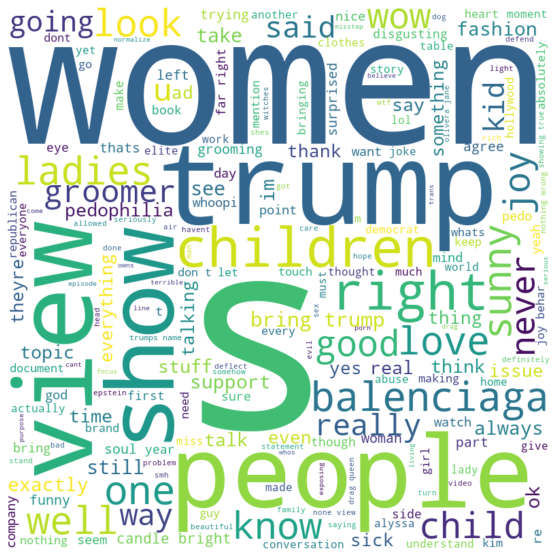

Negative Sentiments


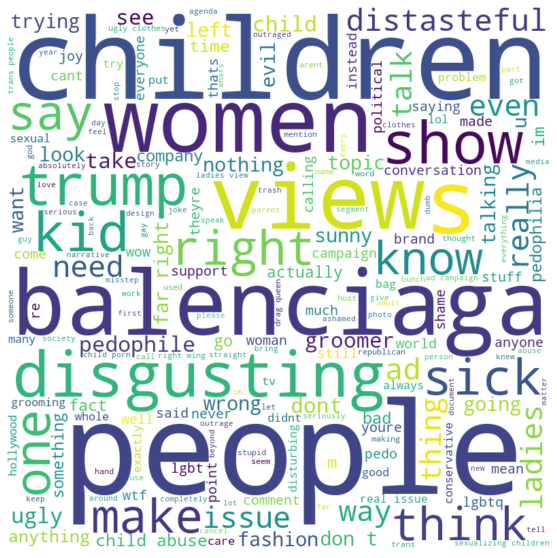

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['transformer_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['transformer_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [52]:
##### creating data frame of labels of the models used.

In [53]:
labels = data[['Comments','vader_labels','roberta_labels','transformer_labels']]

In [54]:
labels.head(10)

,Comments,vader_labels,roberta_labels,transformer_labels
0,hear groomers pedophiles first thing think lgbt drag bigots surely tell lol nooo right wing bigots,Positive,Negative,Negative
1,weakest coverge real issues proper fake news,Negative,Negative,Negative
2,wow false rhetoric show literally makes sick stomach way turn every freaking topic pollical false hood someone show please produce something says people table show experts politics please stop bring every topic speaking former administration trump move old cows move one time go pasture,Positive,Negative,Negative
3,women baalenciaga joy behar tryna pretend doesnt know anything give fkg break dont care kids exploited care whether brand ugly spew disgusting,Negative,Negative,Negative
4,many sickos 😢,Positive,Negative,Negative
5,moment pdophilia right left issue human issue it’s funny it’s one incident several take company openly promotes child sexual abuse… democrat mother can’t good conscience watch show dobetter,Positive,Negative,Positive
6,wow instead addressing issue go blame game trump guys serious real story …… media always cover,Positive,Negative,Negative
7,disgusting supreme court ruling table petifile case look purpose anyone watching snit might well labotamised,Positive,Negative,Negative
8,dare say “right wingers” 🤮 absolutely disrespectful gross conservatives like 33 year old mom absolutely disgusted company fyi fine people genders relationships love fine basically lot stuff old school conservatives religious ues regardless still love racist sexist please try watching political commentary opposite you’d normally listen watch i’m still subscribed several far left democratic channels keeps based love point blank period 🌸 sky except pedos lol,Positive,Negative,Negative
9,believe satanists,Positive,Negative,Negative


In [55]:
####Checking accuracy and F1 Score of the models used.

In [56]:
from sklearn.metrics import accuracy_score, f1_score


# Get the Vader labels
y_true = data['transformer_labels']
# Get the labels from approach 1
y_pred_approach_1 = data['vader_labels']
y_pred_approach_2 = data['roberta_labels']
# Calculate the accuracy score for each approach
acc_approach_1 = accuracy_score(y_true, y_pred_approach_1)
acc_approach_2 = accuracy_score(y_true, y_pred_approach_2)
# Calculate the F1 score for each approach
f1_approach_1 = f1_score(y_true, y_pred_approach_1, average='weighted')
f1_approach_2 = f1_score(y_true, y_pred_approach_2, average='weighted')
# Print the results
 
print("Accuracy for vader_labels : {:.4f}".format(acc_approach_1))
print("F1 score for vader_labels: {:.4f}".format(f1_approach_1))
print("Accuracy for roberta_labels : {:.4f}".format(acc_approach_2))
print("F1 score for roberta_labels: {:.4f}".format(f1_approach_2))

Accuracy for vader_labels : 0.6445
F1 score for vader_labels: 0.6782
Accuracy for roberta_labels : 0.7804
F1 score for roberta_labels: 0.7890


In [57]:
####comparison of the results of the scores of models through plots

In [58]:
import matplotlib.pyplot as plt
vader_f1 = [f1_approach_1,]
roberta_f1 = [f1_approach_2]
vader_acc = [acc_approach_1]
roberta_acc = [acc_approach_2]

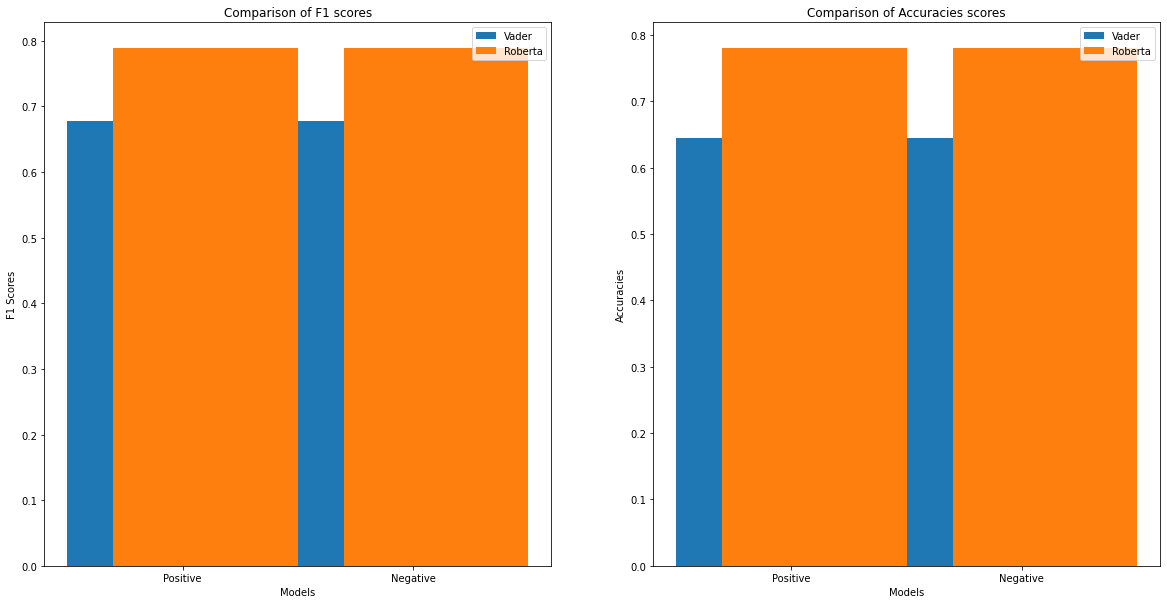

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].bar([0, 1], vader_f1, label='Vader')
axs[0].bar([0.2, 1.2], roberta_f1, label='Roberta')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('F1 Scores')
axs[0].set_xticks([0.1, 1.1])
axs[0].set_xticklabels(['Positive', 'Negative'])
axs[0].set_title('Comparison of F1 scores')
axs[0].legend()
# Plot accuracies in the second subplot
axs[1].bar([0, 1], vader_acc, label='Vader')
axs[1].bar([0.2, 1.2], roberta_acc, label='Roberta')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Accuracies')
axs[1].set_xticks([0.1, 1.1])
axs[1].set_xticklabels(['Positive', 'Negative'])
axs[1].set_title('Comparison of Accuracies scores')
axs[1].legend()

In [60]:
###Conclusion
###Based on the F1 scores, the Roberta model has the highest F1 score of   0.7890,outperforming  Vader model's f1 score of  0.6782, so to conclude ,Roberta model predicted sentiments much accurately than Vader model for a dataset of this type and size.


